Name: Zahra Buchanan
Student #: 1011018818 
Lecture: 0101

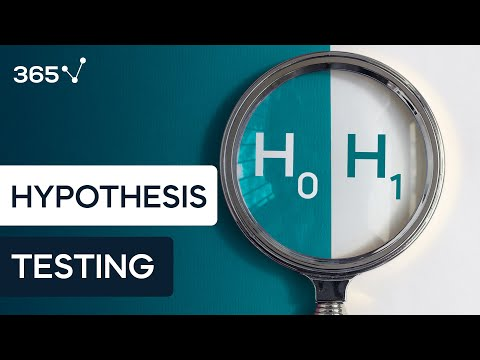

In [1]:
from IPython.display import YouTubeVideo
# First pre-lecture video: 
# "Hypothesis testing. Null vs alternative
# https://www.youtube.com/watch?v=ZzeXCKd5a18
YouTubeVideo('ZzeXCKd5a18', width=800, height=500)

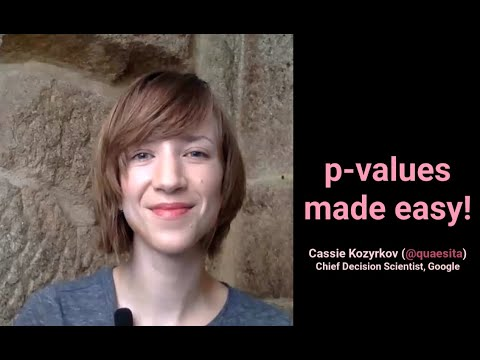

In [2]:
from IPython.display import YouTubeVideo
# Second pre-lecture video
# "What is a p-value"
# https://www.youtube.com/watch?v=9jW9G8MO4PQ
YouTubeVideo('9jW9G8MO4PQ', width=800, height=500)

2.For a statement to be tested statistically it must be specific and quantifiable. The key criteria for defining a good null hypothesis is that it must be specific meaning that it cannot be vague or subjective and it must be neutral. The difference between a null and alternative hypothesis is that the alternative hypothesis is what you are aiming to prove while the null hypothesis is the default scenario you are trying to disprove. 

3.This makes sense to me as imagining a world were the null hypothesis is true really puts the meaning of the p-value into perspective not just based on calculations. It means to me that the p-value represents the likeliness of whatever we are trying to disprove to actually be true.

4.In my opinion, "a smaller p-value makes the null hypothesis look more ridiculous" means that when the p_value is smaller the probabilty of the null hypothesis to be true is very low. 

In [3]:
import numpy as np

# Parameters
n_trials = 124  # number of couples
p_right = 0.5   # probability of tilting right under the null hypothesis
observed_right_tilts = 80  # observed number of couples tilting right
n_simulations = 10000  # number of simulations

# Simulate flipping a fair coin 124 times (representing each couple) over 10,000 simulations
simulated_results = np.random.binomial(n=n_trials, p=p_right, size=n_simulations)

# Calculate the p-value as the proportion of simulations with >= 80 right tilts
p_value = np.mean(simulated_results >= observed_right_tilts)

p_value


0.0014

5.Since p is equivalent to 0.001 I would say there is very strong evidence against the null hypothesis.
Chatbot Link:https://chatgpt.com/share/670892ee-20a8-8008-92fe-f2f0752fd043

6.The p value can not definitively rule out the null hypothesis. It can only determine the likeliness of how true it may be. So it does not matter how small the p-value is it cannot lead to rejecting the null hypothesis.

7.In the one-sided test we are no longer checking whether the vaccine has had a positive effect. It is now only checking for the positive effects. This should in turn make the p-value smaller since it is no longer tracking two opposite outcomes. So the changes made were only keeping track of the sample statistics whose differences from the mean were greater than 0.

In [ ]:
import pandas as pd
import plotly.offline as pyo
import plotly.express as px
import numpy as np

pyo.init_notebook_mode()

# Data for patients
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate the difference in health scores
df['ScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Set random seed for reproducibility
np.random.seed(27)

# Number of bootstrap samples
n_bootstraps = 1000

# Create an array to store the bootstrap estimates
bootstrap_estimates = np.empty(n_bootstraps)

# Generate bootstrap samples and compute the statistic of interest (mean)
for i in range(n_bootstraps):
    # Resample the original data with replacement
    bootstrap_sample = np.random.choice(df['ScoreDifference'], size=len(data), replace=True)
    
    # Calculate the mean of the resampled data
    bootstrap_estimates[i] = np.mean(bootstrap_sample)

# Observed mean of the score difference
observed_mean = np.mean(df['ScoreDifference'])

# One-sided p-value computation: proportion of bootstrap samples where the mean is greater than or equal to the observed mean
greater_count = np.sum(bootstrap_estimates >= observed_mean)
p_value_one_sided = greater_count / n_bootstraps

# Display the one-sided p-value
print(f"One-sided p-value: {p_value_one_sided:.4f}")

# Calculate the 95% bootstrapped confidence interval (for comparison, this is two-sided)
lower_bound = np.quantile(bootstrap_estimates, 0.025)
upper_bound = np.quantile(bootstrap_estimates, 0.975)

print(f"95% Bootstrapped Confidence Interval for the Mean: [{lower_bound}, {upper_bound}]")

# Plot the histogram of the bootstrap estimates
fig = px.histogram(x=bootstrap_estimates, nbins=30, title=f"Bootstrapped Means of Vaccine Impact on Health Score")
fig.add_vrect(x0=lower_bound, x1=upper_bound, fillcolor="blue", opacity=0.2, 
              annotation_text=f'95% Confidence Interval', annotation_position="top left")
fig.update_layout(
    xaxis_title='Bootstrapped Means',
    yaxis_title='Frequency',
    plot_bgcolor='white',
    title=dict(font=dict(size=20, color='darkblue'), x=0.5),
    margin=dict(l=50, r=50, t=100, b=50)
)
mean_val = np.mean(bootstrap_estimates)
fig.add_vline(x=mean_val, line_dash="dash", line_color="red", annotation_text="Mean")

fig.show(renderer="png")


In [1]:
import numpy as np
import scipy.stats as stats

# Set random seed for reproducibility
np.random.seed(42)

# Data
n_students = 80  # total number of students in the experiment
correct_identifications = 49  # number of students who correctly identified the pouring order
sample_proportion = correct_identifications / n_students  # sample proportion

# Null hypothesis: p = 0.5 (students are guessing)
null_proportion = 0.5

# 1. Perform one-sample z-test for proportions

# Standard error under the null hypothesis
std_error = np.sqrt(null_proportion * (1 - null_proportion) / n_students)

# Z-test statistic
z_stat = (sample_proportion - null_proportion) / std_error

# p-value (one-tailed test)
p_value = 1 - stats.norm.cdf(z_stat)

# Print the results of the z-test
print(f"Z-statistic: {z_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Decision rule: if p-value < 0.05, reject the null hypothesis
if p_value < 0.05:
    print("Reject the null hypothesis: There is evidence that students can distinguish the pouring order.")
else:
    print("Fail to reject the null hypothesis: There is no evidence that students can distinguish the pouring order.")

# 2. Construct a 95% confidence interval for the true proportion of students who can identify correctly

# Critical value for a 95% confidence interval
z_critical = stats.norm.ppf(0.975)

# Margin of error
margin_of_error = z_critical * np.sqrt(sample_proportion * (1 - sample_proportion) / n_students)

# Confidence interval
conf_interval = (sample_proportion - margin_of_error, sample_proportion + margin_of_error)
print(f"95% Confidence Interval for the true proportion: {conf_interval[0]:.4f} to {conf_interval[1]:.4f}")

# 3. Bootstrap method to simulate the sampling distribution
n_bootstrap = 10000  # Number of bootstrap samples

# Generate bootstrap samples by resampling with replacement
bootstrap_samples = np.random.binomial(n_students, sample_proportion, size=n_bootstrap) / n_students

# Bootstrap 95% confidence interval using np.percentile
bootstrap_conf_interval = np.percentile(bootstrap_samples, [2.5, 97.5])
print(f"Bootstrap 95% Confidence Interval: {bootstrap_conf_interval[0]:.4f} to {bootstrap_conf_interval[1]:.4f}")


Z-statistic: 2.0125
p-value: 0.0221
Reject the null hypothesis: There is evidence that students can distinguish the pouring order.
95% Confidence Interval for the true proportion: 0.5057 to 0.7193
Bootstrap 95% Confidence Interval: 0.5000 to 0.7125


8.Problem Introduction
This experiment is based off the Fisher and Bristol experiment where they tried to determine whether it could be determined if the milk was poured first based on the taste of the tea. This experiment is being done on a sample of 80 students from a STA130 class. 

-The null hypothesis would be that the students are actually just guessing if the milk was poured first
-The alternative hypothesis would be that students are actually able to tell whether the milk was poured first or not.

Findings and Discussion:Z-statistic: 2.0125
p-value: 0.0221
Reject the null hypothesis: There is evidence that students can distinguish the pouring order.
95% Confidence Interval for the true proportion: 0.5057 to 0.7193
Bootstrap 95% Confidence Interval: 0.5000 to 0.7125

Conclusion regarding the Null Hypothesis: Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is evidence that STA130 students are able to distinguish whether tea or milk was poured first.

ChatBot Summary: Here's a summary of our conversation since you asked about the experiment:

STA130 Experiment Setup:

You asked about an experiment where 49 out of 80 STA130 students correctly identified whether milk or tea was poured first.
The goal was to perform a statistical analysis, including hypothesis testing, on the results.
Hypothesis Formulation:

We discussed the population (STA130 students), the parameter of interest (proportion of students correctly identifying the pouring order), and the observed test statistic (49/80).
You needed to create both formal null hypotheses (e.g., the proportion is equal to a reference value) and alternative hypotheses (e.g., the proportion is greater than the reference value).
Methodology:

You asked for a statistical methodology using code, which involves simulating the sampling distribution under the null hypothesis and performing a hypothesis test.
We discussed the possibility of using a p-value or a confidence interval to evaluate whether to reject the null hypothesis.
P-Value Discussion:

You asked if a smaller p-value could definitively prove the null hypothesis is false. We clarified that p-values never "prove" anything; they only provide evidence. A very small p-value suggests strong evidence against the null, but it doesn’t guarantee it is false.
Similarly, a high p-value doesn’t definitively prove the null hypothesis is true.
One-Tailed vs. Two-Tailed Tests:

We modified a bootstrapping code to calculate a one-sided (or one-tailed) p-value for a hypothesis test, focusing on whether the vaccine had a positive effect on health scores.
You wanted to see how this differs from the two-tailed version and how it affects the interpretation of the hypothesis test.
Final Code:

You received a complete methodology code using bootstrap resampling and the computation of a one-sided p-value to test the hypothesis that the vaccine improved health scores.
This summary covers the main points, from hypothesis formation to the final one-sided hypothesis testing using bootstrapping.

9. Somewhat